# Pandas




In this notebook lecture, we will cover:
- Loading, filtering, and manipulating tabular data with the **pandas** package


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

# 0. Tabular Data Handling with Numpy

Let's say we have data in a file called "GaiaM92.csv" and we want to open it in Python. One option is to use numpy:

In [5]:
data = np.genfromtxt("./GaiaM92.csv", delimiter=",", skip_header=1)
data

array([[ 2.59278972e+02,  4.31089818e+01,             nan, ...,
                    nan,  1.95672800e+01,             nan],
       [ 2.59289978e+02,  4.31050111e+01,             nan, ...,
                    nan,  1.84345000e+01,  6.32349000e-01],
       [ 2.59289054e+02,  4.31133782e+01,             nan, ...,
                    nan,  1.92420200e+01,             nan],
       ...,
       [ 2.59257393e+02,  4.31632966e+01, -3.17254579e+00, ...,
         1.17721990e+00,  1.90242880e+01,  6.21408460e-01],
       [ 2.59272586e+02,  4.31676046e+01, -3.12183086e-01, ...,
         4.06385234e+00,  1.78788530e+01,  6.74488070e-01],
       [ 2.59270560e+02,  4.31673887e+01, -2.00777306e-01, ...,
         1.26197385e+00,  1.91982980e+01,  7.78442400e-01]])

If we wanted to access rows, we could do the following:

In [108]:
print(data[0])

[259.27897188  43.10898178          nan          nan          nan
  19.56728             nan]


Or if we wanted to access specific columns:

In [109]:
print(data[:, 0])

[259.27897188 259.28997796 259.28905426 ... 259.25739277 259.2725861
 259.27056011]


This works, but isn't very inuitive or user-friendly. Fortunately, there is a much nicer way to do the same operations using the package **pandas**!

# 1. What is Pandas, and why should I use it?

Officially, pandas is a ``$ \textit{a fast, powerful, flexible and easy to use open source data analysis and manipulation tool}$" (https://pandas.pydata.org/). 

In practice, **it's a very user-friendly package for working with tabular data with Python**.

### When to use pandas

Pandas offers a convenient, easy-to-visualize interface to tabular data, including the reading/writing steps. This makes it ideal for: 

**(1)** working with small or medium-sized datasets 

**(2)** manipulating data within Jupyter notebooks, and

**(3)** exporting Python data to files.

This notebook will explore each of these cases in some form or another.

### When not to use pandas 

**(1)** The first thing to note is that **pandas is never necessary**: this is a pretty important point. There are other packages than can do everything that pandas can do, and most of its functionality can be reproduced with numpy alone. This being said, **pandas is often the most convenient/user-friendly option**. 

**(2)** This user-friendliness comes with some overhead, i.e., it makes code a bit slower. For this reason, **pandas is not a good option if you are trying to have maximally-fast code** and **not a good option for huge datasets**. 

**(3)** If you need to be very careful about datatypes, pandas is probably not the best tool to use. I almost never run into such situations, but if exporting data with datatypes is important, then csv files (which pandas excels at) are not an option, and you should consider fits files instead.

# 2. "DataFrames": pandas' key tool

The key tool that pandas introduces is the **DataFrame**. Fundamentally, it's just a 2D datastructure with rows and columns (and sometimes an index) -- i.e., it's basically a table.

## 2a. Creating a DataFrame from a file

Pandas can be a very flexible tool for loading in datafiles in many different formats. The one you might most often run into is using data contained in .csv files. Here's how you could load that with pandas:

In [6]:
filepath = "./GaiaM92.csv"
df = pd.read_csv(
    filepath
)  ## df is short for dataframe; this is fairly typical notation for pandas

**That's it!**. That's all it takes to generate a Pandas dataframe from a file. This assumes that the file itself has a row that is just the column names, but that's pretty much it on the input formatting side. Let's crack it open and see what it contains:

In [111]:
df

,ra,dec,parallax,pmra,pmdec,phot_g_mean_mag,bp_rp
0,259.278972,43.108982,NaN,NaN,NaN,19.567280,NaN
1,259.289978,43.105011,NaN,NaN,NaN,18.434500,0.632349
2,259.289054,43.113378,NaN,NaN,NaN,19.242020,NaN
3,259.290390,43.106504,1.533711,-5.808720,-1.708472,19.921402,NaN
4,259.306256,43.110687,1.106775,-4.624149,-1.093990,19.992563,NaN
...,...,...,...,...,...,...,...
8049,259.256567,43.162198,-0.325821,-5.009718,-0.854994,19.102306,NaN
8050,259.265129,43.164826,NaN,NaN,NaN,20.134605,0.631699
8051,259.257393,43.163297,-3.172546,-7.635612,1.177220,19.024288,0.621408
8052,259.272586,43.167605,-0.312183,-4.403949,4.063852,17.878853,0.674488


The table above looks very nice! It's clearly formatted, shows you the column names without lots of extraneous info (e.g. datatypes), etc. It even tells you the dimensions of the table!

As you can also see, there are some entries in this table that are showing "NaN" ("not a number"). And that's OK! Pandas is great at filling in missing entries from tables, which is one reason to use the package in the first place.

Now, the output of the above is obviously truncated. If you want to preview the first 5 rows, you can do:


In [112]:
df.head(10)

,ra,dec,parallax,pmra,pmdec,phot_g_mean_mag,bp_rp
0,259.278972,43.108982,NaN,NaN,NaN,19.567280,NaN
1,259.289978,43.105011,NaN,NaN,NaN,18.434500,0.632349
2,259.289054,43.113378,NaN,NaN,NaN,19.242020,NaN
3,259.290390,43.106504,1.533711,-5.808720,-1.708472,19.921402,NaN
4,259.306256,43.110687,1.106775,-4.624149,-1.093990,19.992563,NaN
5,259.268118,43.104699,-1.036598,-4.683732,-0.519738,19.920280,0.756393
6,259.268331,43.104789,NaN,NaN,NaN,20.417160,NaN
7,259.268817,43.106339,-0.031390,-5.688505,0.143810,19.317175,NaN
8,259.268159,43.105793,-0.770001,-1.065605,4.497394,19.669512,-0.181538
9,259.267877,43.105856,NaN,NaN,NaN,20.450974,NaN


Have a long list of columns? You can print them easily:

In [113]:
print(df.columns)

Index(['ra', 'dec', 'parallax', 'pmra', 'pmdec', 'phot_g_mean_mag', 'bp_rp'], dtype='object')


## 2b. Isolating Columns!

Pandas makes it trivial to access certain columns in your data. This is in contrast to raw numpy arrays. To do so with pandas, we can simply use the following notation:

In [114]:
df["ra"]

0       259.278972
1       259.289978
2       259.289054
3       259.290390
4       259.306256
           ...    
8049    259.256567
8050    259.265129
8051    259.257393
8052    259.272586
8053    259.270560
Name: ra, Length: 8054, dtype: float64

The above is what we call a **Series** in pandas. It functions basically the same as a numpy array, but carries with it an index. If you just want the values, you can add ".values" to the end:

In [115]:
df["ra"].values

array([259.27897188, 259.28997796, 259.28905426, ..., 259.25739277,
       259.2725861 , 259.27056011])

**Importantly, the above is a numpy array already**! This makes it somewhat clearer what is going on "under the hood": pandas dataframes are very similar to organized collections of numpy arrays.

If you want a single row, you will need the index of that row. For the case of index 0, this looks like:

In [116]:
df.iloc[0].values

array([259.27897188,  43.10898178,          nan,          nan,
                nan,  19.56728   ,          nan])

## 2c. Creating new columns in an existing dataframe

In [117]:
df

,ra,dec,parallax,pmra,pmdec,phot_g_mean_mag,bp_rp
0,259.278972,43.108982,NaN,NaN,NaN,19.567280,NaN
1,259.289978,43.105011,NaN,NaN,NaN,18.434500,0.632349
2,259.289054,43.113378,NaN,NaN,NaN,19.242020,NaN
3,259.290390,43.106504,1.533711,-5.808720,-1.708472,19.921402,NaN
4,259.306256,43.110687,1.106775,-4.624149,-1.093990,19.992563,NaN
...,...,...,...,...,...,...,...
8049,259.256567,43.162198,-0.325821,-5.009718,-0.854994,19.102306,NaN
8050,259.265129,43.164826,NaN,NaN,NaN,20.134605,0.631699
8051,259.257393,43.163297,-3.172546,-7.635612,1.177220,19.024288,0.621408
8052,259.272586,43.167605,-0.312183,-4.403949,4.063852,17.878853,0.674488


Want to use a column (or more than one!) to create a new column! It's super simple with pandas. Let's see how that works:

In [118]:
df["NewColumn"] = np.sqrt(df["pmra"] ** 2 + df["pmdec"] ** 2)

Now if we re-show the dataframe, our new column will be there

In [119]:
df.head()

,ra,dec,parallax,pmra,pmdec,phot_g_mean_mag,bp_rp,NewColumn
0,259.278972,43.108982,NaN,NaN,NaN,19.567280,NaN,NaN
1,259.289978,43.105011,NaN,NaN,NaN,18.434500,0.632349,NaN
2,259.289054,43.113378,NaN,NaN,NaN,19.242020,NaN,NaN
3,259.290390,43.106504,1.533711,-5.808720,-1.708472,19.921402,NaN,6.054759
4,259.306256,43.110687,1.106775,-4.624149,-1.093990,19.992563,NaN,4.751796


What if you have an entirely new column that is not dependent on other columns (as in the case above?). Let's see the case of adding a new column of random numbers.

In [120]:
df["NewColumn2"] = np.random.uniform(
    size=len(df)
)  ## fill new column with random numbers between 0 and 1

In [121]:
df.head()

,ra,dec,parallax,pmra,pmdec,phot_g_mean_mag,bp_rp,NewColumn,NewColumn2
0,259.278972,43.108982,NaN,NaN,NaN,19.567280,NaN,NaN,0.111252
1,259.289978,43.105011,NaN,NaN,NaN,18.434500,0.632349,NaN,0.732642
2,259.289054,43.113378,NaN,NaN,NaN,19.242020,NaN,NaN,0.112738
3,259.290390,43.106504,1.533711,-5.808720,-1.708472,19.921402,NaN,6.054759,0.827502
4,259.306256,43.110687,1.106775,-4.624149,-1.093990,19.992563,NaN,4.751796,0.128081


## 2d. Other ways to load in tables:

As noted before, there's a number of other ways you can load tabular data from files. For example,

In [122]:
df2 = pd.read_csv(
    "https://support.staffbase.com/hc/en-us/article_attachments/360009197011/username-password-recovery-code.csv"
)

In [123]:
df2

,Username; Identifier;One-time password;Recovery code;First name;Last name;Department;Location
0,booker12;9012;12se74;rb9012;Rachel;Booker;Sale...
1,grey07;2070;04ap67;lg2070;Laura;Grey;Depot;London
2,johnson81;4081;30no86;cj4081;Craig;Johnson;Dep...
3,jenkins46;9346;14ju73;mj9346;Mary;Jenkins;Engi...
4,smith79;5079;09ja61;js5079;Jamie;Smith;Enginee...


Oh no! It looks mangled. The problem here is that the **delimeter** is wrong. In other words, the character specifying the separation between entries is not correct. Before it was a comma (hence the "c" in csv file), but here it's a semicolon. 

Pandas can handle that. Just use the "delimeter = " argument as below:

In [124]:
df2 = pd.read_csv(
    "https://support.staffbase.com/hc/en-us/article_attachments/360009197011/username-password-recovery-code.csv",
    delimiter=";",
)

In [125]:
df2

,Username,Identifier,One-time password,Recovery code,First name,Last name,Department,Location
0,booker12,9012,12se74,rb9012,Rachel,Booker,Sales,Manchester
1,grey07,2070,04ap67,lg2070,Laura,Grey,Depot,London
2,johnson81,4081,30no86,cj4081,Craig,Johnson,Depot,London
3,jenkins46,9346,14ju73,mj9346,Mary,Jenkins,Engineering,Manchester
4,smith79,5079,09ja61,js5079,Jamie,Smith,Engineering,Manchester


and voila! It's fixed. The same can even be done if the delimiter is whitespace, in which case you want to use the delim_whitespace = True argument to read_csv().In short: pandas can handle data that is not simply a generic .csv file.

## 2e. Saving Dataframes

To save a dataframe (e.g., after you have made edits), one need only call .to_csv():

In [126]:
df.to_csv("Modified_data.csv")

which will save your file.

# 3. Creating Dataframes "From Scratch'': a great way to save results

Oftentimes, we don't have begin data in a file, but we want to save the data into one. For example, one situation that often comes up in research is that you have run trials / a Monte Carlo simulation and you want a way to export that information (e.g., for exact reproducibility of your plots). 

Let's generate some mock data to demonstrate this:

In [127]:
array_1 = np.random.normal(size=1000)
array_2 = 10 * array_1

and here's how to make that into a dataframe assuming each array above is its own column:

In [128]:
combined = np.column_stack([array_1, array_2])

In [129]:
new_dataframe = pd.DataFrame(combined)

In [130]:
new_dataframe

,0,1
0,0.600289,6.002889
1,0.835341,8.353410
2,0.876270,8.762703
3,1.515567,15.155666
4,-0.140828,-1.408279
...,...,...
995,-1.444972,-14.449715
996,0.467964,4.679637
997,1.380318,13.803183
998,-0.835870,-8.358704


This obviously doesn't have column names, but we can add them easily:

In [131]:
new_dataframe.columns = ["col1", "col2"]
new_dataframe.head()

,col1,col2
0,0.600289,6.002889
1,0.835341,8.353410
2,0.876270,8.762703
3,1.515567,15.155666
4,-0.140828,-1.408279


**Using Dictionaries**

The same can also be achieved using dictionaries and the from_dict() method. For example,

In [132]:
data_dictionary = {"col1": array_1, "col2": array_2}
new_dataframe = pd.DataFrame.from_dict(data_dictionary)
new_dataframe.head()

,col1,col2
0,0.600289,6.002889
1,0.835341,8.353410
2,0.876270,8.762703
3,1.515567,15.155666
4,-0.140828,-1.408279


# 4. Filtering Data

What if we want to access subsets of the data? **It's just like numpy arrays!** You just pass the columns instead. For example,

In [133]:
filter1 = df["pmra"] > 1
filter1

0       False
1       False
2       False
3       False
4       False
        ...  
8049    False
8050    False
8051    False
8052    False
8053    False
Name: pmra, Length: 8054, dtype: bool

This generates a Series full of boolean (True/False) values. This might not be very useful on its own, but if we wanted to fully isolate the rows, we could use these booleans to create a new dataframe that meets our condtion. For example,

In [136]:
filtered_dataframe = df[filter1]

The same works with multiple conditions (and can be done in one line - just watch parantheses placement):

In [137]:
filtered_dataframe = df[(df["pmra"] > 4) & (df["pmra"] > 4)]

# 5. Plotting Data 

Pandas dataframe columns can be passed to matplotlib just like any other numpy array. Let's see how that works:

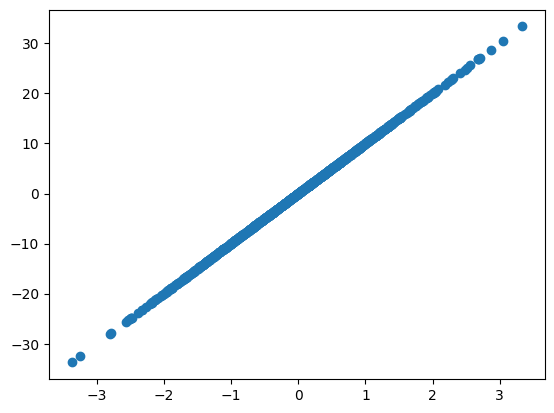

In [138]:
plt.scatter(new_dataframe["col1"], new_dataframe["col2"])

An entirely equivalent method is to do as follows:

<AxesSubplot:xlabel='col1', ylabel='col2'>

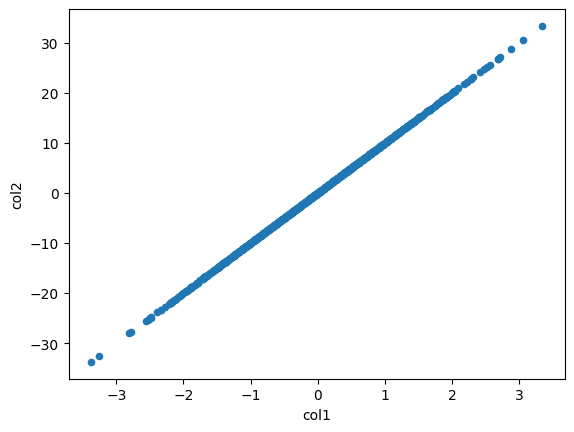

In [139]:
new_dataframe.plot.scatter("col1", "col2")

This one comes with free labels!

:::{admonition} Exercise: Plotting a Hertzsprung-Russell Diagram of the Globular Cluster M92 using Data from the Gaia Mission 
:class: tip


The *Gaia* satellite has collected stellar positions, motions, and brightnesses for nearly two billion stars in the Milky Way. The file "GaiaM92.csv" contains example data from *Gaia* specifically for the globular star cluster Messier 92 (M92). To investigate the data, take the following steps:

1. Load the .csv file into a dataframe called m92_data. Each row in this datafile is an individual star.

2. Plot a histogram of the column "phot_g_mean_mag". This is the column that contains the brightnesses of stars.  What do you notice about the distribution?

3. Now, make a scatterplot with the column "bp_rp" (a proxy for color) on the x-axis and "phot_g_mean_mag" (a proxy for luminosity) on the y-axis. Is the distribution in this plane uniform, or do you see patterns/sequences.

4. Clean up the scatterplot from part 3: first, invert the y-axis so smaller numbers are at the top of the plot, and limit the x range to -0.5 to 2.  Then, change the marker size and color to be small, black points. Lastly, label both axes something physically meaningful (not just the column names)

5. Compare your diagram to the one shown at this link: [Cluster HR Diagram](https://www.mps.mpg.de/5484970/original-1534168518.png?t=eyJ3aWR0aCI6ODAwLCJoZWlnaHQiOjYwMCwib2JqX2lkIjo1NDg0OTcwfQ==--5f4cb09228b20d5b3a71fbd40fa5a346ee619316). Can you observe the same features in your plot?
